Practical Implementation of Clustering Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/kmeans/student_clustering.csv")

In [3]:
df.head(5)

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


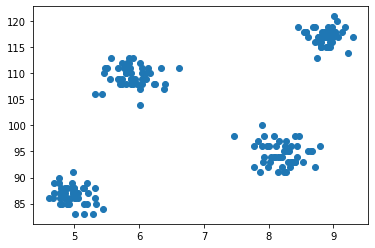

In [4]:
plt.scatter(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)


In [7]:
wcss

[29957.898287999997,
 4184.14127,
 2362.7133490000006,
 681.96966,
 514.1616803171115,
 388.8524026875981,
 302.653499358208,
 233.54082485509014,
 202.06818704953463,
 180.0547752811831]

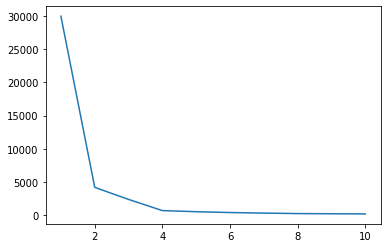

In [8]:
plt.plot(range(1,11),wcss)

According to elbow it is showing 4 will be better

In [9]:
# taking all things in numpy array it works fast
x=df.iloc[:,:].values
x

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [10]:
# now doing it for clusters = 4
km=KMeans(n_clusters=4)
y_op=km.fit_predict(x)
y_op

array([0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 1, 3, 1, 3, 1, 1, 3, 0,
       3, 0, 0, 3, 0, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2, 1, 0, 1, 0, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 0, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 3, 2, 0, 2,
       3, 0, 1, 3, 1, 2, 3, 0, 1, 2, 1, 2, 0, 3, 3, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 3, 0, 3, 3, 2, 3, 0, 2, 1, 0, 0, 2, 0, 0, 3, 0, 2, 2,
       3, 2, 1, 1, 3, 2, 3, 1, 2, 0, 0, 1, 3, 2, 3, 0, 3, 1, 0, 3, 3, 1,
       0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 3, 1, 2, 1, 3, 0, 2, 1, 3, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 3,
       2, 1, 0, 2, 2, 1, 1, 1, 3, 0, 3, 3, 2, 1, 3, 3, 0, 0, 3, 0, 2, 1,
       1, 2])

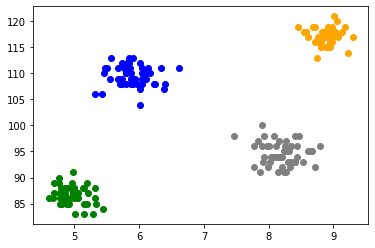

In [11]:
# now to make graph we have to put then in x,y format so we will extract x cordinate and y cordinate
plt.scatter(x[y_op==0,0],x[y_op==0,1],color='green')
plt.scatter(x[y_op==1,0],x[y_op==1,1],color='blue')
plt.scatter(x[y_op==2,0],x[y_op==2,1],color='orange')
plt.scatter(x[y_op==3,0],x[y_op==3,1],color='grey')

# Hierarichal Technique

In [12]:
dfh=pd.read_csv("Mall_Customers.csv")
dfh.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [13]:
datasubset=dfh.loc[:,['Age',"Annual Income (k$)"]]
datasubset

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


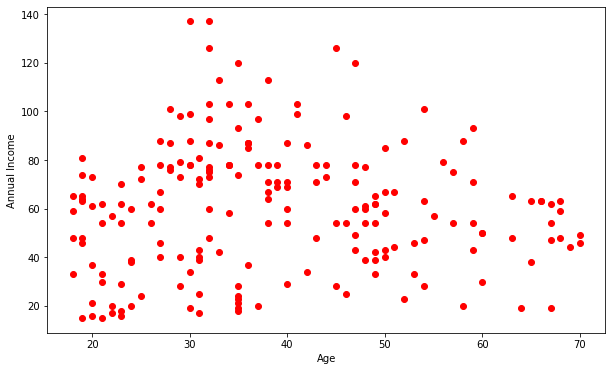

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(datasubset['Age'],datasubset["Annual Income (k$)"],color='red')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.show()

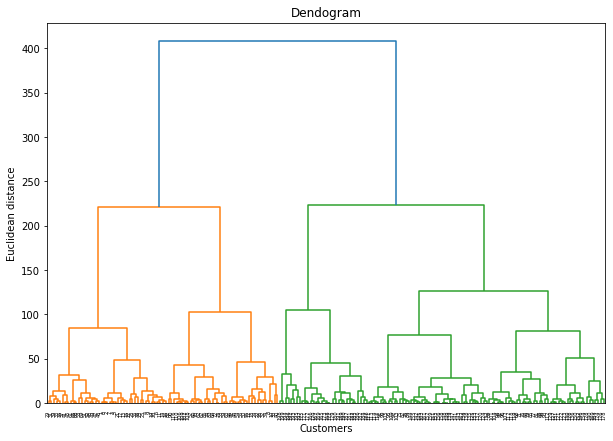

In [32]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram=sch.dendrogram(sch.linkage(datasubset,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [34]:
c=cluster.fit_predict(datasubset)

In [35]:
from sklearn.metrics import silhouette_score

In [37]:
silhouette_score(datasubset,c)

0.4104652474372429

so from here we can get the idea that feature scaling can actually affect your model either positively or negatively

# DBSCAN Clustering

In [15]:
from sklearn.cluster import DBSCAN
x=np.array([[1,2],[3,4],[4,3],[8,7],[7,8],[25,80]])

In [16]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 4,  3],
       [ 8,  7],
       [ 7,  8],
       [25, 80]])

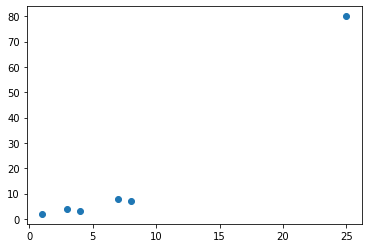

In [17]:
plt.scatter(x[:,0],x[:,1])

In [19]:
clustering=DBSCAN(eps=3,min_samples=2)
clustering.fit(x)

DBSCAN(eps=3, min_samples=2)

In [30]:
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

# Difference b/w Dbscan and kMeans

In [22]:
km1=KMeans(n_clusters=2,random_state=0)
km1.fit(x)

KMeans(n_clusters=2, random_state=0)

In [23]:
km1.labels_

array([0, 0, 0, 0, 0, 1])

In [26]:
km1.cluster_centers_

array([[ 4.6,  4.8],
       [25. , 80. ]])

In [25]:
km1.predict([[0,0],[12,3]])

array([0, 0])

In [27]:
# kmeans does not  work well on outliers and non-separate data 
# while Dbscan focus more on density based work.